In [2]:
from astropy.io import fits

In [73]:
f1 = "Betelgeuse_TE_cont_ap1wt.image.image.tt0.fits"
f2 = "Betelgeuse_TC_cont.image.image.fits"
f3 = "Betelgeuse_TC_cont.image.image.pbcor.fits"
f4 = "Betelgeuse_TC_contap2_wt.image.image.tt0.fits"
f5 = "Betelgeuse_TC_contap2_wt.image.image.tt0.fits.1"
f6 = "Betelgeuse_TC_contap2_wt.image.image.tt0.pbcor.fits"
f7 = "Betelgeuse_TE_cont.image.image.fits"
f8 = "Betelgeuse_TE_cont_R0.image.image.tt0.fits"
f9 = "Betelgeuse_TE_cont_ap1wt.image.alpha.error.fits"
f10 = "Betelgeuse_TE_cont_ap1wt.image.alpha.fits"
f11 = "Betelgeuse_TE_cont_ap1wt.image.image.tt0.fits"
f12 = "Betelgeuse_all_cont_1-1.image.alpha.error.fits"
f13 = "Betelgeuse_all_cont_1-1.image.alpha.fits"
f14 = "Betelgeuse_all_cont_1-1.image.image.tt0.fits"

In [78]:
files = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14]

In [79]:
import numpy as np

In [80]:
hdu = list(np.arange(0,len(files)))
data = list(np.arange(0,len(files)))
header = list(np.arange(0,len(files)))

In [81]:
for i in range(len(files)):
    if i!=0:
        files[i] = "from_server/"+files[i]
    hdu[i] = fits.open(files[i],update = False)
    data[i] = hdu[i][0].data
    header[i] = hdu[i][0].header


In [82]:
from astropy import units as u

In [83]:
kspatres = list(np.arange(0,len(files)))

In [84]:
header[0]['BMAJ']*u.deg.to(u.arcsec)

0.01736348308623

In [85]:
dates = list(np.arange(0,len(files)))

In [86]:
for i in range(len(header)):
    kspatres[i] = np.sqrt(header[i]['BMAJ']*u.deg.to(u.arcsec)*header[i]['BMIN']*u.deg.to(u.arcsec))
    dates[i] = header[i]['DATE-OBS']
    print(kspatres[i])

0.01675138584460281
0.18444060410509736
0.18444060410509736
0.17603995805882852
0.17603995805882852
0.17603995805882852
0.016403798996860126
0.018229371903607936
0.01675138584460281
0.01675138584460281
0.01675138584460281
0.040566339161841755
0.040566339161841755
0.040566339161841755


In [87]:
for i in range(len(header)):
    print(data[i].shape)

(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 300, 300)
(1, 1, 1000, 1000)
(1, 1, 1000, 1000)
(1, 1, 1000, 1000)


In [88]:
cent = list(np.arange(0,len(data)))
for i in range(len(header)):
    cent[i] = (int(np.where(np.nanmax(data[i])==data[i])[2]),int(np.where(np.nanmax(data[i])==data[i])[3]))

In [89]:
import pandas as pd

In [93]:
filenames = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14]

In [94]:
d = {"file": filenames,"kspatres ''": kspatres, "center": cent,"date_obs": dates}

df = pd.DataFrame(data = d)

In [180]:
for i in range(len(files)):
    if "error" in files[i]:
        print("e",i)
    if "alpha" in files[i]:
        print("a",i)
    # if "pbcor" in files[i]:
    #     print("p",i)

e 8
a 8
a 9
e 11
a 11
a 12


In [184]:
df.sort_values(by="kspatres ''")

,file,kspatres '',center,date_obs
6,Betelgeuse_TE_cont.image.image.fits,0.016404,"(147, 144)",2015-11-07T06:48:59.664001
0,Betelgeuse_TE_cont_ap1wt.image.image.tt0.fits,0.016751,"(151, 143)",2015-11-06T08:54:49.872000
8,Betelgeuse_TE_cont_ap1wt.image.alpha.error.fits,0.016751,"(84, 92)",2015-11-06T08:54:49.872000
9,Betelgeuse_TE_cont_ap1wt.image.alpha.fits,0.016751,"(84, 92)",2015-11-06T08:54:49.872000
10,Betelgeuse_TE_cont_ap1wt.image.image.tt0.fits,0.016751,"(151, 143)",2015-11-06T08:54:49.872000
7,Betelgeuse_TE_cont_R0.image.image.tt0.fits,0.018229,"(150, 144)",2015-11-06T08:54:49.872000
11,Betelgeuse_all_cont_1-1.image.alpha.error.fits,0.040566,"(488, 491)",2015-11-06T08:54:51.888001
12,Betelgeuse_all_cont_1-1.image.alpha.fits,0.040566,"(863, 156)",2015-11-06T08:54:51.888001
13,Betelgeuse_all_cont_1-1.image.image.tt0.fits,0.040566,"(499, 499)",2015-11-06T08:54:51.888001
3,Betelgeuse_TC_contap2_wt.image.image.tt0.fits,0.176040,"(149, 148)",2016-08-16T14:34:28.511999


In [125]:
from matplotlib import pyplot as plt

In [136]:
pix_size_hr = (np.abs(header[6]['CDELT1'])*u.deg,np.abs(header[6]['CDELT2'])*u.deg)
pix_size_arcsec_hr = pix_size_hr[0].to(u.arcsec)
print(pix_size_hr)

(<Quantity 5.55555556e-07 deg>, <Quantity 5.55555556e-07 deg>)


In [137]:
pix_size_hr = (np.abs(header[0]['CDELT1'])*u.deg,np.abs(header[0]['CDELT2'])*u.deg)
pix_size_arcsec_hr = pix_size_hr[0].to(u.arcsec)
print(pix_size_hr)

(<Quantity 5.55555556e-07 deg>, <Quantity 5.55555556e-07 deg>)


Text(0.5, 1.0, '0.016403798996860126')

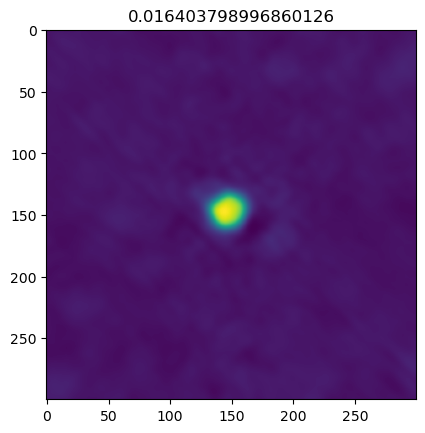

In [133]:
plt.imshow(data[6][0,0,...])
plt.title(kspatres[6])

Text(0.5, 1.0, '0.18444060410509736')

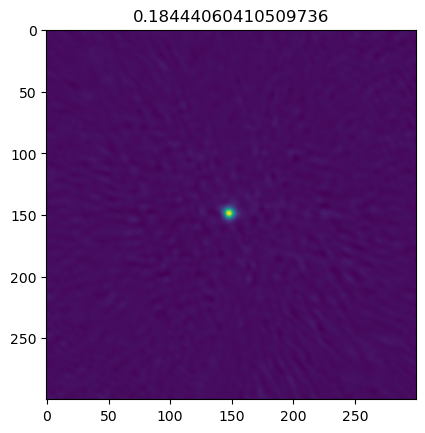

In [138]:
plt.imshow(data[1][0,0,...])
plt.title(kspatres[1])

In [176]:
def a_d(drhr, dlr,info_reproj,info_lr):
    '''
    reproj_hr_pixel_norm, data_jy_per_pixel_lr,info_conv,info_lr
    '''

    col_diff = (info_reproj['position'][1]-info_lr['position'][1])
    row_diff = (info_reproj['position'][0]-info_lr['position'][0])

    print("row_diff: ",row_diff)
    print("col_diff: ", col_diff)

    print("SHAPES")
    print("dlr shape: ", dlr.shape)
    print("drhr shape: ", drhr.shape)


    a = [dlr.shape[0]]*np.abs(row_diff)
    b = [0]*np.abs(row_diff)

    if (row_diff>0): # center is later in conv. lr needs to be pushed down
        dlr_add = np.insert(dlr, b, np.nan, axis = 0)
        drhr_add = np.insert(drhr, a, np.nan, axis = 0)
        print(1)
    if (row_diff<0): # center is later in lr. conv needs to be pushed down
        dlr_add = np.insert(dlr, a, np.nan,axis=0)
        drhr_add = np.insert(drhr, b, np.nan,axis=0)
        print(2)

    print("MAXIMA:")
    print("dlr center: ", np.where(dlr==np.nanmax(dlr)))
    print("drhr center: ", np.where(drhr==np.nanmax(drhr)))
    print("dlr_add center: ", np.where(dlr_add==np.nanmax(dlr_add)))
    print("drhr_add center: ", np.where(drhr_add==np.nanmax(drhr_add)))

    c = [dlr.shape[1]]*np.abs(col_diff)
    d = [0]*np.abs(col_diff)

    if (col_diff>0): # center is later in conv. lr needs to be shifted right
        dlr_add = np.insert(dlr_add, d, np.nan, axis = 1)
        drhr_add = np.insert(drhr_add, c, np.nan, axis=1)
        print(3)
    if (col_diff<0):
        dlr_add = np.insert(dlr_add, c, np.nan, axis = 1)
        drhr_add = np.insert(drhr_add, d, np.nan, axis = 1)
        print(4)

    print("MAXIMA:")
    print("dlr center: ", np.where(dlr==np.nanmax(dlr)))
    print("drhr center: ", np.where(drhr==np.nanmax(drhr)))
    print("dlr_add center: ", np.where(dlr_add==np.nanmax(dlr_add)))
    print("drhr_add center: ", np.where(drhr_add==np.nanmax(drhr_add)))

    print()
    print("SHAPES")
    print("dlr shape: ", dlr.shape)
    print("drhr shape: ", drhr.shape)
    print("dlr_add shape: ", dlr_add.shape)
    print("drhr_add shape: ", drhr_add.shape)

In [177]:
a_d(data[1][0,0,...],data[6][0,0,...], info_1,info_6)

row_diff:  2
col_diff:  4
SHAPES
dlr shape:  (300, 300)
drhr shape:  (300, 300)
1
MAXIMA:
dlr center:  (array([147]), array([144]))
drhr center:  (array([149]), array([148]))
dlr_add center:  (array([149]), array([144]))
drhr_add center:  (array([149]), array([148]))
3
MAXIMA:
dlr center:  (array([147]), array([144]))
drhr center:  (array([149]), array([148]))
dlr_add center:  (array([149]), array([148]))
drhr_add center:  (array([149]), array([148]))

SHAPES
dlr shape:  (300, 300)
drhr shape:  (300, 300)
dlr_add shape:  (302, 304)
drhr_add shape:  (302, 304)


In [142]:
np.where(data[1]==np.nanmax(data[1]))

(array([0]), array([0]), array([149]), array([148]))

In [145]:
info_1 = {"position": cent[1]}

In [146]:
info_1['position']

(149, 148)

In [152]:
info_6 = {"position": cent[6]}

In [153]:
info_6

{'position': (147, 144)}

In [179]:
files[1]

'from_server/Betelgeuse_TC_cont.image.image.fits'

In [178]:
files[6]

'from_server/Betelgeuse_TE_cont.image.image.fits'